In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Product.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [3]:
X=data.iloc[:,[2,3]].values
Y=data.iloc[:,4].values

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2)
np.shape(X_train)

(320, 2)

In [6]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_predicted=model.predict(X_test)

In [8]:
y_predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [9]:
Y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [10]:
matrix=confusion_matrix(Y_test,y_predicted)
matrix

array([[51,  4],
       [ 4, 21]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        55
           1       0.84      0.84      0.84        25

    accuracy                           0.90        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.90      0.90      0.90        80



In [12]:
accuracy_score(Y_test, y_predicted)

0.9

Text(0.5, 48.29999999999998, 'Predicted label')

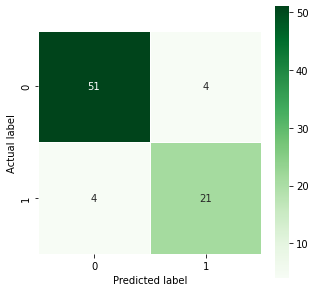

In [13]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(Y_test,y_predicted),linewidths=.5, annot=True,square = True,  cmap = 'Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')